<a href="https://colab.research.google.com/github/DogwonLee/Final-Team2/blob/patch-1/final_2%ED%8C%80_%EC%9D%B4%EB%8F%84%EA%B6%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#이도권: 룸 타입을 통한 기존 호텔과 다른 에어비앤비의 경쟁력

##데이터 LOAD

In [ ]:
import pandas as pd

In [ ]:
#데이터 불러오기
data = pd.read_csv('/content/combined_dataset.csv')

In [ ]:
#데이터 훑어보기
data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,23163,https://www.airbnb.com/rooms/23163,20240325142220,2024-03-25,city scrape,Residence Karolina - KAROL12,"Unique and elegant apartment rental in Prague,...",NaN,https://a0.muscache.com/pictures/01bbe32c-3f13...,5282,...,4.96,4.93,4.86,NaN,t,70,69,0,0,0.18
1,23169,https://www.airbnb.com/rooms/23169,20240325142220,2024-03-25,city scrape,Residence Masna - Masna302,Masna studio offers a lot of space and privacy...,NaN,https://a0.muscache.com/pictures/b450cf2a-8561...,5282,...,4.86,4.97,4.69,NaN,t,70,69,0,0,0.69
2,26755,https://www.airbnb.com/rooms/26755,20240325142220,2024-03-25,city scrape,Central Prague Old Town Top Floor,Big and beautiful new attic apartment in the v...,This apartment offers a fantastic location. Yo...,https://a0.muscache.com/pictures/miso/Hosting-...,113902,...,4.96,4.93,4.89,NaN,f,3,3,0,0,3.32
3,30762,https://www.airbnb.com/rooms/30762,20240325142220,2024-03-25,city scrape,Residence Rybna - Rybna23,"We offer a modern, comfortable, serviced apart...",NaN,https://a0.muscache.com/pictures/dfbb2fc2-91a0...,5282,...,4.69,4.94,4.50,NaN,t,70,69,0,0,0.10
4,42514,https://www.airbnb.com/rooms/42514,20240325142220,2024-03-25,city scrape,"""NEWLY FURNISHED"" 1BR near Pachtuv Palace,Old ...",*NEWLY* Furnished 1-bedroom apartment on the f...,NaN,https://a0.muscache.com/pictures/7f66bc43-25c7...,185641,...,4.84,4.90,4.79,NaN,f,1,1,0,0,2.01


##여긴 어디인가?

In [ ]:
#동네 종류
data['neighbourhood_cleansed'].unique()

array(['Praha 1', 'Praha 2', 'Praha 3', 'Praha 7', 'Praha 5', 'Praha 15',
       'Praha 8', 'Praha 9', 'Praha 10', 'Praha 6', 'Praha 4', 'Praha 14',
       'Praha 13', 'Velká Chuchle', 'Kunratice', 'Zličín', 'Zbraslav',
       'Petrovice', 'Praha 21', 'Suchdol', 'Praha 12', 'Praha 11',
       'Praha 16', 'Klánovice', 'Praha 17', 'Šeberov', 'Štěrboholy',
       'Ďáblice', 'Dolní Počernice', 'Praha 18', 'Libuš', 'Řeporyje',
       'Březiněves', 'Nebušice', 'Satalice', 'Praha 22', 'Troja',
       'Dolní Chabry', 'Čakovice', 'Praha 19', 'Lipence', 'Újezd',
       'Dolní Měcholupy', 'Slivenec', 'Praha 20', 'Lysolaje', 'Vinoř',
       'Nedvězí', 'Koloděje', 'Přední Kopanina', 'Běchovice', 'Kolovraty',
       'Dubeč'], dtype=object)

##데이터 뜯어보기

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11446 entries, 0 to 11445
Data columns (total 76 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   id                                            11446 non-null  int64   
 1   listing_url                                   11446 non-null  object  
 2   scrape_id                                     11446 non-null  int64   
 3   last_scraped                                  11446 non-null  object  
 4   source                                        11446 non-null  object  
 5   name                                          11446 non-null  object  
 6   description                                   9276 non-null   object  
 7   neighborhood_overview                         5663 non-null   object  
 8   picture_url                                   11446 non-null  object  
 9   host_id                                       1144

In [ ]:
#슈퍼호스트 컬럼의 Null값 개수
data['host_is_superhost'].isna().sum()

np.int64(273)

In [ ]:
#슈퍼호스트 컬럼의 Null값 비율
data['host_is_superhost'].isna().sum() / data['host_is_superhost'].count() # 2.4% 정도니 그냥 버리자!

np.float64(0.02443390315940213)



---



##Room Type

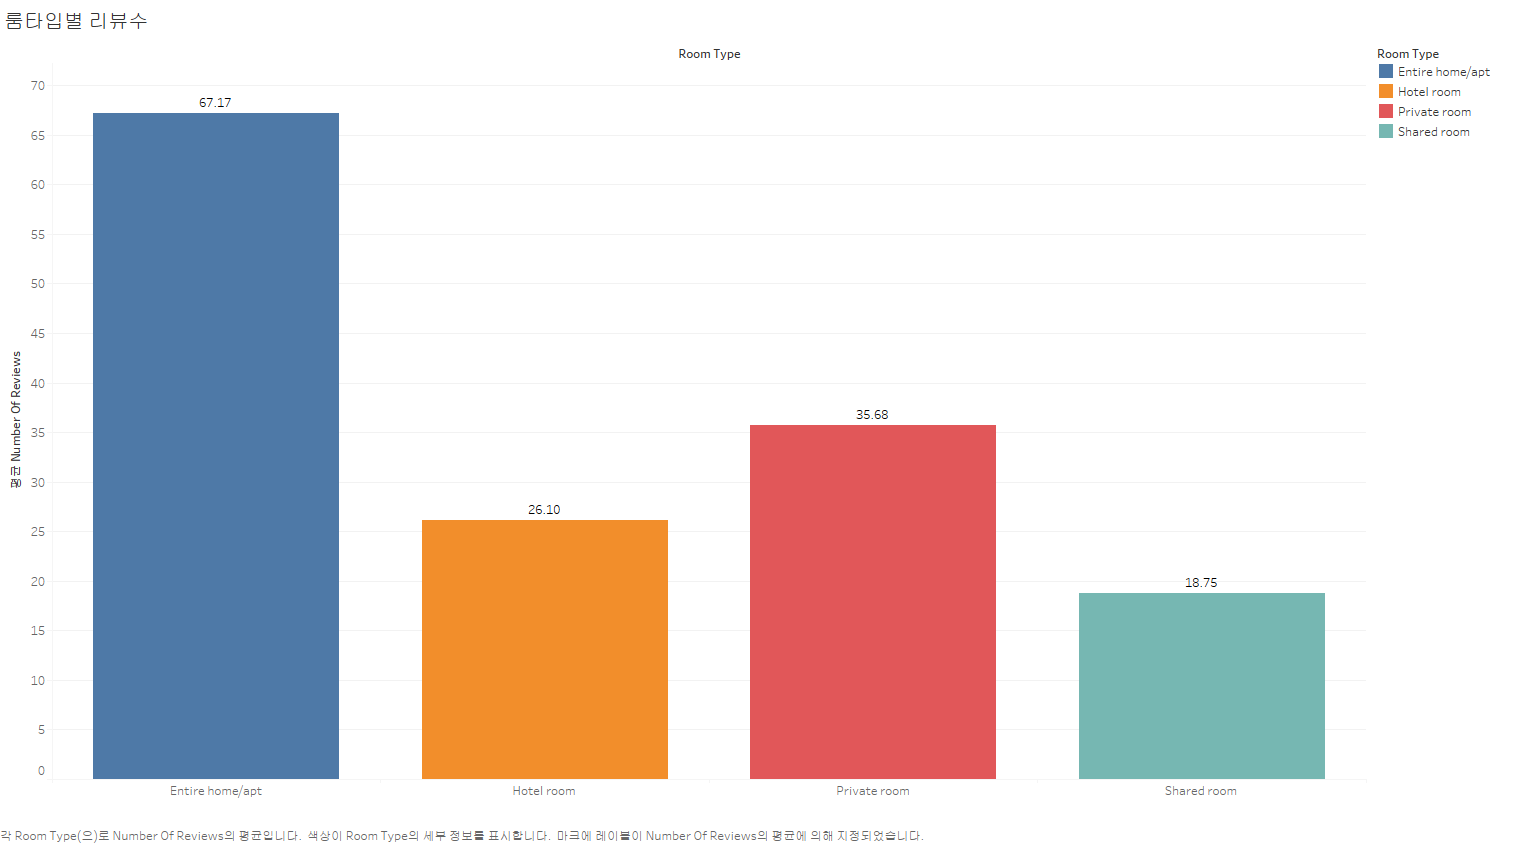

In [ ]:
# 룸타입 종류
data['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [ ]:
# 룸타입의 결측치
data['room_type'].isna().sum() #없네.

np.int64(0)

In [ ]:
# 룸타입별 가격
data2 = pd.read_csv('/content/airbnb_with_price_num.csv')

In [ ]:
data2[['room_type','price_num']]

,room_type,price_num
0,Entire home/apt,3955.0
1,Entire home/apt,2955.0
2,Entire home/apt,3223.0
3,Entire home/apt,6741.0
4,Entire home/apt,2763.0
...,...,...
11441,Private room,523.0
11442,Entire home/apt,2357.0
11443,Entire home/apt,1120.0
11444,Private room,1141.0


In [ ]:
# 룸타입별 가격
Entire_home_prices = data2[data2['room_type'] == 'Entire home/apt']['price_num']
Private_room_prices = data2[data2['room_type'] == 'Private room']['price_num']
Hotel_room_prices = data2[data2['room_type'] == 'Hotel room']['price_num']
Shared_room_prices = data2[data2['room_type'] == 'Shared room']['price_num']

In [ ]:
Entire_home_prices

,price_num
0,3955.0
1,2955.0
2,3223.0
3,6741.0
4,2763.0
...,...
11438,1635.0
11439,1635.0
11440,2400.0
11442,2357.0


In [ ]:
#한글 글씨 폰트 설치
%%capture
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
plt.rcParams['font.family'] = 'NanumGothic'

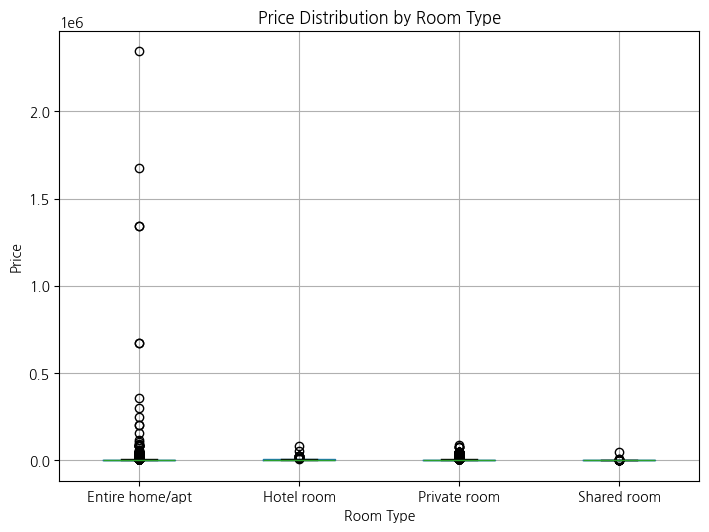

In [ ]:
import matplotlib.pyplot as plt

# DataFrame 이름이 df 라고 가정
data2.boxplot(column='price_num', by='room_type', figsize=(8,6))
plt.title('Price Distribution by Room Type')
plt.suptitle('')  # 기본 제목 제거
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()


###룸타입별 이상치 제거

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

def remove_outliers_by_type(df, room_type):
    """특정 room_type에 대해 IQR 기준 이상치 제거"""
    subset = df[df['room_type'] == room_type]
    q1  = subset['price_num'].quantile(0.25)
    q3  = subset['price_num'].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    return df[
        (df['room_type'] != room_type) |
        ((df['room_type'] == room_type) &
         (df['price_num'] >= lower) &
         (df['price_num'] <= upper))
    ]

# 원본을 단계별로 업데이트
no_outlier_all = data2.copy()

for rt in ['Entire home/apt', 'Private room', 'Hotel room', 'Shared room']:
    no_outlier_all = remove_outliers_by_type(no_outlier_all, rt)

# 결과 확인
print(no_outlier_all.shape)


(9809, 76)


### 가격을 수치화하고 이상치 제거한 버전 (no_outlier_all)

In [ ]:
no_outlier_all

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_num
0,23163,https://www.airbnb.com/rooms/23163,20240325142220,2024-03-25,city scrape,Residence Karolina - KAROL12,"Unique and elegant apartment rental in Prague,...",NaN,https://a0.muscache.com/pictures/01bbe32c-3f13...,5282,...,4.93,4.86,NaN,t,70,69,0,0,0.18,3955.0
1,23169,https://www.airbnb.com/rooms/23169,20240325142220,2024-03-25,city scrape,Residence Masna - Masna302,Masna studio offers a lot of space and privacy...,NaN,https://a0.muscache.com/pictures/b450cf2a-8561...,5282,...,4.97,4.69,NaN,t,70,69,0,0,0.69,2955.0
2,26755,https://www.airbnb.com/rooms/26755,20240325142220,2024-03-25,city scrape,Central Prague Old Town Top Floor,Big and beautiful new attic apartment in the v...,This apartment offers a fantastic location. Yo...,https://a0.muscache.com/pictures/miso/Hosting-...,113902,...,4.93,4.89,NaN,f,3,3,0,0,3.32,3223.0
3,30762,https://www.airbnb.com/rooms/30762,20240325142220,2024-03-25,city scrape,Residence Rybna - Rybna23,"We offer a modern, comfortable, serviced apart...",NaN,https://a0.muscache.com/pictures/dfbb2fc2-91a0...,5282,...,4.94,4.50,NaN,t,70,69,0,0,0.10,6741.0
4,42514,https://www.airbnb.com/rooms/42514,20240325142220,2024-03-25,city scrape,"""NEWLY FURNISHED"" 1BR near Pachtuv Palace,Old ...",*NEWLY* Furnished 1-bedroom apartment on the f...,NaN,https://a0.muscache.com/pictures/7f66bc43-25c7...,185641,...,4.90,4.79,NaN,f,1,1,0,0,2.01,2763.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11441,981052671610489770,https://www.airbnb.com/rooms/981052671610489770,20230917033704,2023-09-17,city scrape,Bed and breakfast in Praha 7 · ★New · 1 bedroo...,Capsule hostel is the future of travelers. It ...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,499362507,...,NaN,NaN,NaN,t,1,0,1,0,NaN,523.0
11442,981147682732529851,https://www.airbnb.com/rooms/981147682732529851,20230917033704,2023-09-17,city scrape,Rental unit in Praha 5 · ★New · 1 bedroom · 2 ...,Enjoy your Prague holiday in my modern and cos...,"Velmi klidné sousedství, 5 min od velkého náku...",https://a0.muscache.com/pictures/miso/Hosting-...,54027671,...,NaN,NaN,NaN,f,1,1,0,0,NaN,2357.0
11443,981149791292539293,https://www.airbnb.com/rooms/981149791292539293,20230917033704,2023-09-17,city scrape,Rental unit in Praha 1 · ★New · 1 bedroom · 3 ...,"Welcome to our spacious, quiet apartment, perf...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,468925367,...,NaN,NaN,NaN,t,2,2,0,0,NaN,1120.0
11444,981241350406265221,https://www.airbnb.com/rooms/981241350406265221,20230917033704,2023-09-17,city scrape,Rental unit in Praha 1 · ★New · 1 bedroom · 1 ...,Спокойно планируйте маршруты: жилье расположен...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,507431786,...,NaN,NaN,NaN,t,5,0,5,0,NaN,1141.0


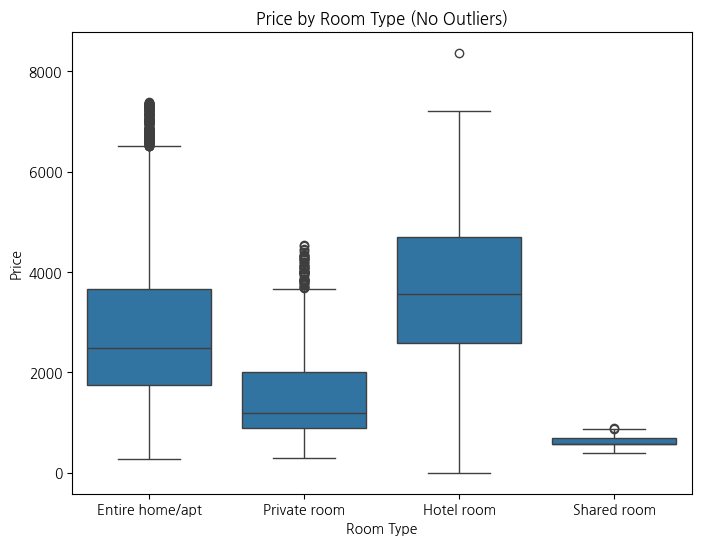

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.boxplot(x='room_type', y='price_num', data=no_outlier_all)
plt.title('Price by Room Type (No Outliers)')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()




---



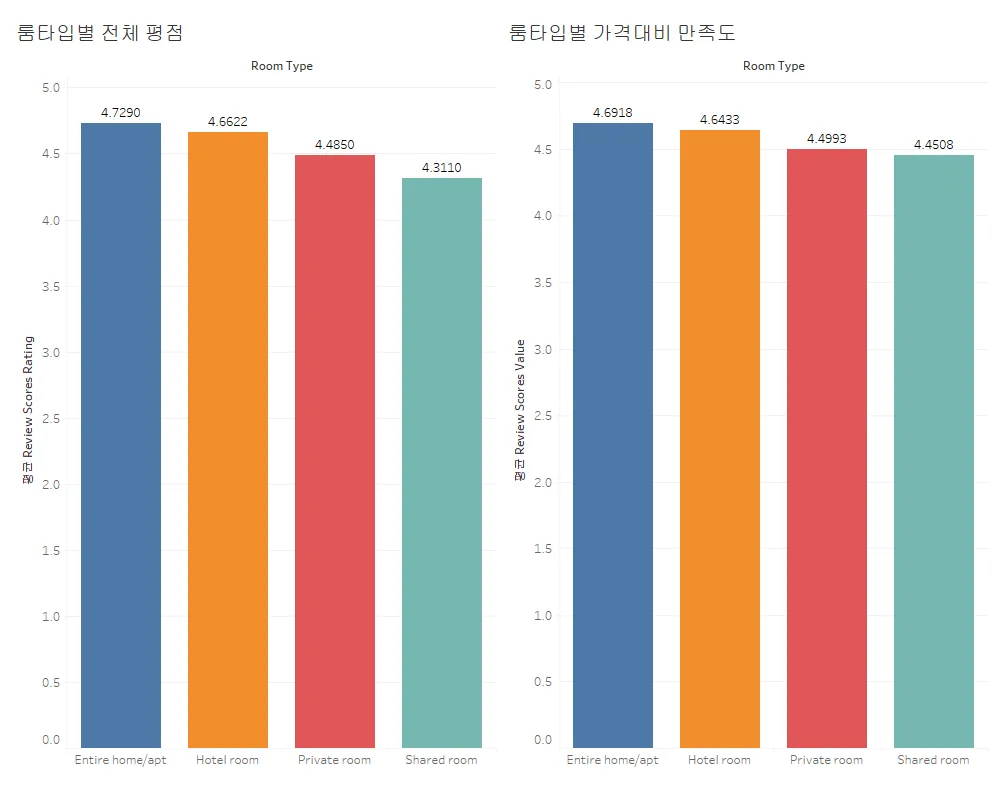

In [ ]:
# 평점에도 이상치가 있을까?
num_rating_greater_than_5 = (data['review_scores_rating'] > 5).sum()
print(f"review_scores_rating이 5보다 큰 값의 개수: {num_rating_greater_than_5}")
num_value_greater_than_5 = (data['review_scores_value'] > 5).sum()
print(f"review_scores_value이 5보다 큰 값의 개수: {num_value_greater_than_5}")

review_scores_rating이 5보다 큰 값의 개수: 0
review_scores_value이 5보다 큰 값의 개수: 0


###Room Type별 숙소 개수

In [ ]:
data['room_type'].value_counts()

,count
room_type,
공간 전체,8957
개인실,2171
호텔 객실,170
다인실,148


In [ ]:
data.groupby('room_type')['id'].count().reset_index(name='숙소 개수')

,room_type,숙소 개수
0,개인실,2171
1,공간 전체,8957
2,다인실,148
3,호텔 객실,170


###숙소 개수 비율

In [ ]:
(data['room_type'] == '공간 전체').value_counts()

,count
room_type,
False,11446


In [ ]:
(data['room_type'] == '공간 전체').count() / len(data)

np.float64(1.0)

##가격 대비 만족도 (제일 중요한 변수)

In [ ]:
data['review_scores_value']

,review_scores_value
0,4.86
1,4.69
2,4.89
3,4.50
4,4.79
...,...
11441,NaN
11442,NaN
11443,NaN
11444,NaN


In [ ]:
data['review_scores_value'].describe()

,review_scores_value
count,9926.000000
mean,4.655840
std,0.415475
min,1.000000
25%,4.580000
50%,4.750000
75%,4.880000
max,5.000000


In [ ]:
# 개수
data['review_scores_value'].count()

np.int64(9926)

In [ ]:
# 결측치
data['review_scores_value'].isna().sum()

np.int64(1520)

In [ ]:
#가치 대비 만족도 컬럼의 Null값 비율
data['review_scores_value'].isna().sum() / data['review_scores_value'].count() # 15% 정도니 그냥 버리자!

np.float64(0.153133185573242)

## 전체 평점

In [ ]:
data['review_scores_rating'].describe()

,review_scores_rating
count,9951.000000
mean,4.682039
std,0.434840
min,0.000000
25%,4.590000
50%,4.800000
75%,4.930000
max,5.000000


In [ ]:
# 전체 평점 컬럼의 Null값 비율
data['review_scores_rating'].isna().sum() / data['review_scores_rating'].count()

np.float64(0.15023615717013367)

##얼굴 유무 컬럼

In [ ]:
import cv2, io, requests
import numpy as np
import pandas as pd
from PIL import Image
from tqdm import tqdm

# ---------------------------------------------------------
# 1) 얼굴 검출기 준비
# ---------------------------------------------------------
cascade_path = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(cascade_path)

def detect_face_pil(pil_img, min_size=(30,30), scaleFactor=1.1, minNeighbors=5):
    """PIL 이미지에서 얼굴 유무(True/False) 검출"""
    try:
        img = np.array(pil_img.convert('RGB'))
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        faces = face_cascade.detectMultiScale(
            gray, scaleFactor=scaleFactor,
            minNeighbors=minNeighbors,
            minSize=min_size
        )
        return len(faces) > 0
    except Exception:
        return np.nan   # 변환 실패 → NaN

# ---------------------------------------------------------
# 2) 이미지 다운로드
# ---------------------------------------------------------
SESSION = requests.Session()
SESSION.headers.update({"User-Agent": "Mozilla/5.0"})

def fetch_image(url, timeout=10):
    r = SESSION.get(url, stream=True, timeout=timeout)
    ct = r.headers.get('Content-Type','').lower()
    if 'image' not in ct:
        raise ValueError(f"Not an image content-type: {ct}")
    return Image.open(io.BytesIO(r.content))

# ---------------------------------------------------------
# 3) 얼굴 검출 컬럼 생성 (오류 → NaN)
# ---------------------------------------------------------
url_face_cache = {}  # 중복 URL 캐시
host_face_detected = pd.Series(np.nan, index=data.index)  # 초기값 NaN

urls = data['host_picture_url'].astype(str).str.strip().replace({'nan': ''})
targets = urls[urls != '']

for idx, url in tqdm(targets.items(), total=len(targets)):
    if url in url_face_cache:
        host_face_detected.iloc[idx] = url_face_cache[url]
        continue
    try:
        img = fetch_image(url, timeout=10)
        # 큰 이미지는 축소
        max_side = max(img.size)
        if max_side > 800:
            scale = 800.0 / max_side
            new_size = (int(img.size[0]*scale), int(img.size[1]*scale))
            img = img.resize(new_size)
        ok = detect_face_pil(img)   # True / False / NaN
    except Exception:
        ok = np.nan   # 다운로드/디코딩 오류 → NaN

    url_face_cache[url] = ok
    host_face_detected.iloc[idx] = ok

# Convert boolean values to 1 and 0, keep NaN as is
data['host_face_detected'] = host_face_detected.map({True: 1, False: 0, np.nan: np.nan})

  0%|          | 0/11446 [00:00<?, ?it/s]/tmp/ipython-input-3342648299.py:66: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  host_face_detected.iloc[idx] = ok
 28%|██▊       | 3169/11446 [02:38<03:16, 42.10it/s]/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
100%|██████████| 11446/11446 [07:40<00:00, 24.86it/s]


In [ ]:
# '얼굴 있음', '얼굴 없음', NaN 개수
face_counts_with_nan = df['host_face_detected'].value_counts(dropna=False).reset_index()
face_counts_with_nan.columns = ['host_face_detected', 'count']

face_counts_with_nan['host_face_detected_label'] = face_counts_with_nan['host_face_detected'].map({
    0.0: '얼굴 없음',
    1.0: '얼굴 있음',
    pd.NA: 'NaN', # Map pandas.NA to 'NaN' string
    np.nan: 'NaN' # Map numpy.nan to 'NaN' string
})

print("호스트 사진 얼굴 여부별 숙소 개수 (NaN 포함):")
display(face_counts_with_nan[['host_face_detected_label', 'count']])

호스트 사진 얼굴 여부별 숙소 개수 (NaN 포함):


,host_face_detected_label,count
0,얼굴 없음,6089
1,얼굴 있음,5303
2,NaN,54


##추론 통계



*   귀무 가설 : Room Type 과 가격 대비 만족도 (가성비) 사이에 유의한 차이가 없다.
*   대립 가설 : Room Type 과 가격 대비 만족도 (가성비) 사이에 유의한 차이가 있다.




### 데이터 전처리

**MICE (다중 대체)**

In [ ]:
from sklearn.experimental import enable_iterative_imputer  # noqa: F401
from sklearn.impute import IterativeImputer
import pandas as pd
import numpy as np

# 1) 대체할 컬럼 지정
cols = ['review_scores_value', 'review_scores_rating']

# 2) Imputer 설정 (MICE 느낌으로 sample_posterior 옵션도 가능)
imp = IterativeImputer(random_state=42, max_iter=10, sample_posterior=True)

# 3) 숫자형으로 준비 (문자형 섞였으면 변환)
X = data[cols].astype(float)

# 4) 적합 & 변환
imputed_arr = imp.fit_transform(X)            # shape: (11446, 2)

# 5) DataFrame으로 복원 (컬럼명과 인덱스 반드시 맞추기)
imputed_df = pd.DataFrame(imputed_arr, columns=cols, index=data.index)

# 6) 원본에 붙이되, 새 이름으로 보존
data[[c + '_imputed' for c in cols]] = imputed_df



In [ ]:
data

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,review_scores_value_imputed,review_scores_rating_imputed
0,23163,https://www.airbnb.com/rooms/23163,20240325142220,2024-03-25,city scrape,Residence Karolina - KAROL12,"Unique and elegant apartment rental in Prague,...",NaN,https://a0.muscache.com/pictures/01bbe32c-3f13...,5282,...,4.86,NaN,t,70,69,0,0,0.18,4.860000,4.900000
1,23169,https://www.airbnb.com/rooms/23169,20240325142220,2024-03-25,city scrape,Residence Masna - Masna302,Masna studio offers a lot of space and privacy...,NaN,https://a0.muscache.com/pictures/b450cf2a-8561...,5282,...,4.69,NaN,t,70,69,0,0,0.69,4.690000,4.730000
2,26755,https://www.airbnb.com/rooms/26755,20240325142220,2024-03-25,city scrape,Central Prague Old Town Top Floor,Big and beautiful new attic apartment in the v...,This apartment offers a fantastic location. Yo...,https://a0.muscache.com/pictures/miso/Hosting-...,113902,...,4.89,NaN,f,3,3,0,0,3.32,4.890000,4.940000
3,30762,https://www.airbnb.com/rooms/30762,20240325142220,2024-03-25,city scrape,Residence Rybna - Rybna23,"We offer a modern, comfortable, serviced apart...",NaN,https://a0.muscache.com/pictures/dfbb2fc2-91a0...,5282,...,4.50,NaN,t,70,69,0,0,0.10,4.500000,4.750000
4,42514,https://www.airbnb.com/rooms/42514,20240325142220,2024-03-25,city scrape,"""NEWLY FURNISHED"" 1BR near Pachtuv Palace,Old ...",*NEWLY* Furnished 1-bedroom apartment on the f...,NaN,https://a0.muscache.com/pictures/7f66bc43-25c7...,185641,...,4.79,NaN,f,1,1,0,0,2.01,4.790000,4.760000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11441,981052671610489770,https://www.airbnb.com/rooms/981052671610489770,20230917033704,2023-09-17,city scrape,Bed and breakfast in Praha 7 · ★New · 1 bedroo...,Capsule hostel is the future of travelers. It ...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,499362507,...,NaN,NaN,t,1,0,1,0,NaN,4.203429,4.281269
11442,981147682732529851,https://www.airbnb.com/rooms/981147682732529851,20230917033704,2023-09-17,city scrape,Rental unit in Praha 5 · ★New · 1 bedroom · 2 ...,Enjoy your Prague holiday in my modern and cos...,"Velmi klidné sousedství, 5 min od velkého náku...",https://a0.muscache.com/pictures/miso/Hosting-...,54027671,...,NaN,NaN,f,1,1,0,0,NaN,4.716414,4.573974
11443,981149791292539293,https://www.airbnb.com/rooms/981149791292539293,20230917033704,2023-09-17,city scrape,Rental unit in Praha 1 · ★New · 1 bedroom · 3 ...,"Welcome to our spacious, quiet apartment, perf...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,468925367,...,NaN,NaN,t,2,2,0,0,NaN,4.684094,5.104478
11444,981241350406265221,https://www.airbnb.com/rooms/981241350406265221,20230917033704,2023-09-17,city scrape,Rental unit in Praha 1 · ★New · 1 bedroom · 1 ...,Спокойно планируйте маршруты: жилье расположен...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,507431786,...,NaN,NaN,t,5,0,5,0,NaN,4.754505,4.786890


In [ ]:
data[['review_scores_value_imputed','review_scores_rating_imputed']]

,review_scores_value_imputed,review_scores_rating_imputed
0,4.860000,4.900000
1,4.690000,4.730000
2,4.890000,4.940000
3,4.500000,4.750000
4,4.790000,4.760000
...,...,...
11441,4.203429,4.281269
11442,4.716414,4.573974
11443,4.684094,5.104478
11444,4.754505,4.786890




---



**로그 스케일**

In [ ]:
# 로그 변환 컬럼 만들기
data['review_scores_value_log'] = np.log5(data['review_scores_value_imputed'])
data['review_scores_rating_log'] = np.log5(data['review_scores_rating_imputed'])


AttributeError: module 'numpy' has no attribute 'log5'

In [ ]:
data

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,review_scores_value_imputed,review_scores_rating_imputed,review_scores_value_log,review_scores_rating_log
0,23163,https://www.airbnb.com/rooms/23163,20240325142220,2024-03-25,city scrape,Residence Karolina - KAROL12,"Unique and elegant apartment rental in Prague,...",NaN,https://a0.muscache.com/pictures/01bbe32c-3f13...,5282,...,t,70,69,0,0,0.18,4.860000,4.900000,1.581038,1.774952
1,23169,https://www.airbnb.com/rooms/23169,20240325142220,2024-03-25,city scrape,Residence Masna - Masna302,Masna studio offers a lot of space and privacy...,NaN,https://a0.muscache.com/pictures/b450cf2a-8561...,5282,...,t,70,69,0,0,0.69,4.690000,4.730000,1.545433,1.745716
2,26755,https://www.airbnb.com/rooms/26755,20240325142220,2024-03-25,city scrape,Central Prague Old Town Top Floor,Big and beautiful new attic apartment in the v...,This apartment offers a fantastic location. Yo...,https://a0.muscache.com/pictures/miso/Hosting-...,113902,...,f,3,3,0,0,3.32,4.890000,4.940000,1.587192,1.781709
3,30762,https://www.airbnb.com/rooms/30762,20240325142220,2024-03-25,city scrape,Residence Rybna - Rybna23,"We offer a modern, comfortable, serviced apart...",NaN,https://a0.muscache.com/pictures/dfbb2fc2-91a0...,5282,...,t,70,69,0,0,0.10,4.500000,4.750000,1.504077,1.749200
4,42514,https://www.airbnb.com/rooms/42514,20240325142220,2024-03-25,city scrape,"""NEWLY FURNISHED"" 1BR near Pachtuv Palace,Old ...",*NEWLY* Furnished 1-bedroom apartment on the f...,NaN,https://a0.muscache.com/pictures/7f66bc43-25c7...,185641,...,f,1,1,0,0,2.01,4.790000,4.760000,1.566530,1.750937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11441,981052671610489770,https://www.airbnb.com/rooms/981052671610489770,20230917033704,2023-09-17,city scrape,Bed and breakfast in Praha 7 · ★New · 1 bedroo...,Capsule hostel is the future of travelers. It ...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,499362507,...,t,1,0,1,0,NaN,4.203429,4.281269,1.435901,1.664166
11442,981147682732529851,https://www.airbnb.com/rooms/981147682732529851,20230917033704,2023-09-17,city scrape,Rental unit in Praha 5 · ★New · 1 bedroom · 2 ...,Enjoy your Prague holiday in my modern and cos...,"Velmi klidné sousedství, 5 min od velkého náku...",https://a0.muscache.com/pictures/miso/Hosting-...,54027671,...,f,1,1,0,0,NaN,4.716414,4.573974,1.551049,1.718108
11443,981149791292539293,https://www.airbnb.com/rooms/981149791292539293,20230917033704,2023-09-17,city scrape,Rental unit in Praha 1 · ★New · 1 bedroom · 3 ...,"Welcome to our spacious, quiet apartment, perf...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,468925367,...,t,2,2,0,0,NaN,4.684094,5.104478,1.544173,1.809023
11444,981241350406265221,https://www.airbnb.com/rooms/981241350406265221,20230917033704,2023-09-17,city scrape,Rental unit in Praha 1 · ★New · 1 bedroom · 1 ...,Спокойно планируйте маршруты: жилье расположен...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,507431786,...,t,5,0,5,0,NaN,4.754505,4.786890,1.559093,1.755595


In [ ]:
data[['review_scores_value_log','review_scores_rating_log']]


,review_scores_value_log,review_scores_rating_log
0,1.581038,1.774952
1,1.545433,1.745716
2,1.587192,1.781709
3,1.504077,1.749200
4,1.566530,1.750937
...,...,...
11441,1.435901,1.664166
11442,1.551049,1.718108
11443,1.544173,1.809023
11444,1.559093,1.755595


In [ ]:
# 측정 변수들의 짧은 이름 정의
measurements = ['review_scores_value_log', 'review_scores_rating_log']
short_names = ['가성비 평점', '전체 평점']

#### BOX-COX

In [ ]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox
import numpy as np
import pandas as pd

def boxcox_to_column(df, col, out_col):
    """
    df[col]에 Box-Cox 변환을 적용해 df[out_col]에 저장.
    필요 시 shift를 더해 양수화하고, NaN은 유지.
    반환: lambda, shift
    """
    s = df[col]
    mask = s.notna()                 # 유효값 위치
    x = s[mask].astype(float)

    # Box-Cox는 >0만 가능 → 최소값이 0 이하이면 shift
    minval = x.min()
    shift = 0.0
    if minval <= 0:
        shift = 1 - minval + 1e-6    # 예: min=0이면 1.000001을 더해 양수화

    y, lam = boxcox(x + shift)       # 변환 (길이는 mask True 개수와 동일)

    # 결과를 원래 인덱스에 맞춰 넣기
    df[out_col] = np.nan
    df.loc[mask, out_col] = y

    return lam, shift

# 적용
lam_val, shift_val = boxcox_to_column(data, 'review_scores_value',   'review_scores_value_boxcox')
lam_rat, shift_rat = boxcox_to_column(data, 'review_scores_rating', 'review_scores_rating_boxcox')

print(f"value:  lambda={lam_val:.4f}, shift={shift_val}")
print(f"rating: lambda={lam_rat:.4f}, shift={shift_rat}")


value:  lambda=8.8581, shift=0.0
rating: lambda=11.3938, shift=1.000001


### 정규성 검정

In [ ]:
#한글 글씨 폰트 설치
%%capture
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
plt.rcParams['font.family'] = 'NanumGothic'

####로그 스케일

/tmp/ipython-input-1000362814.py:32: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


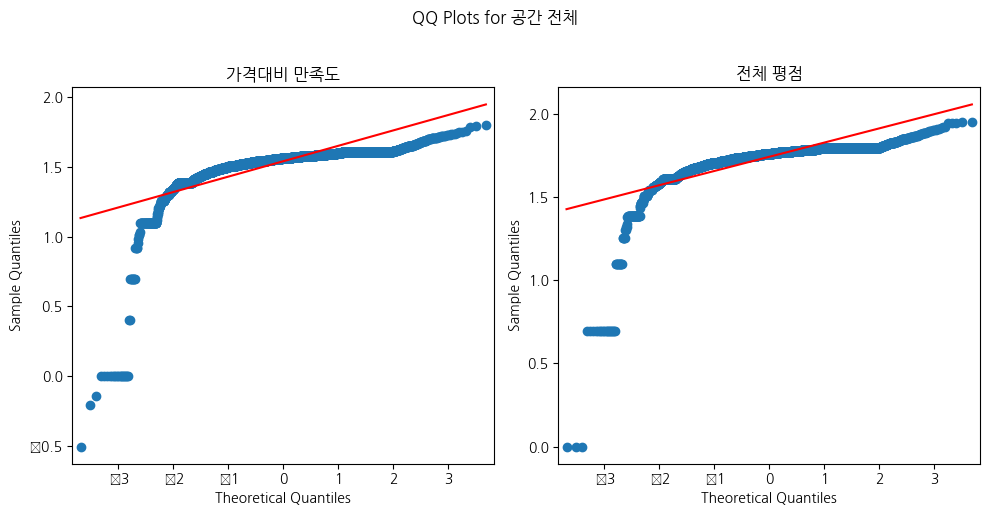

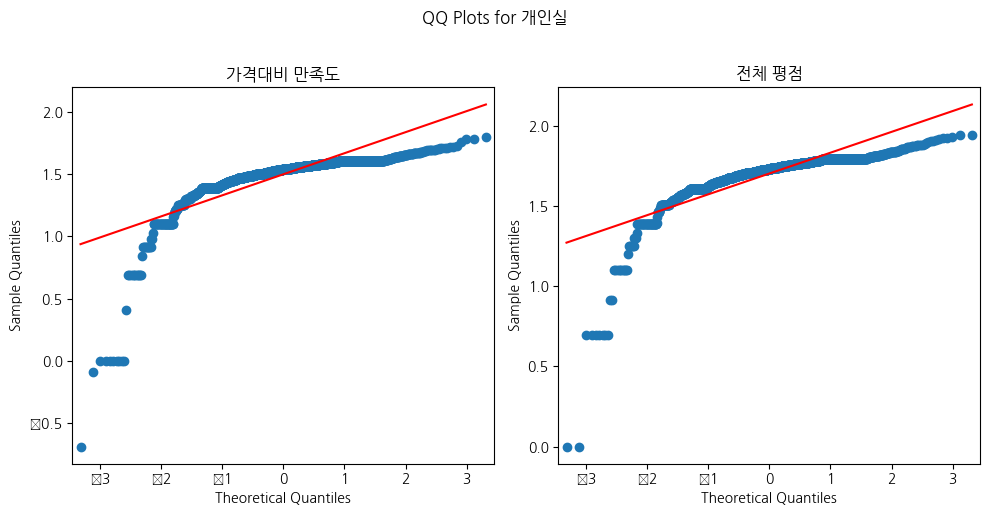

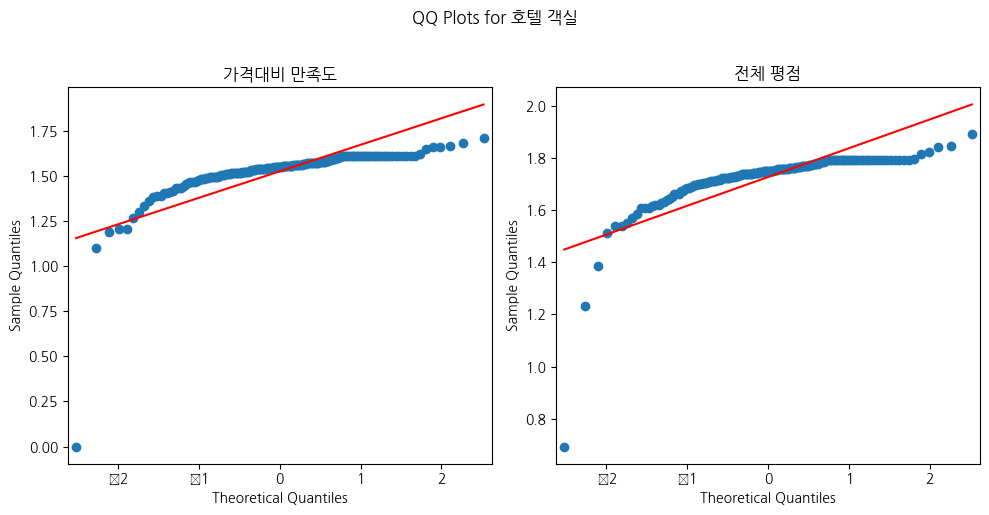

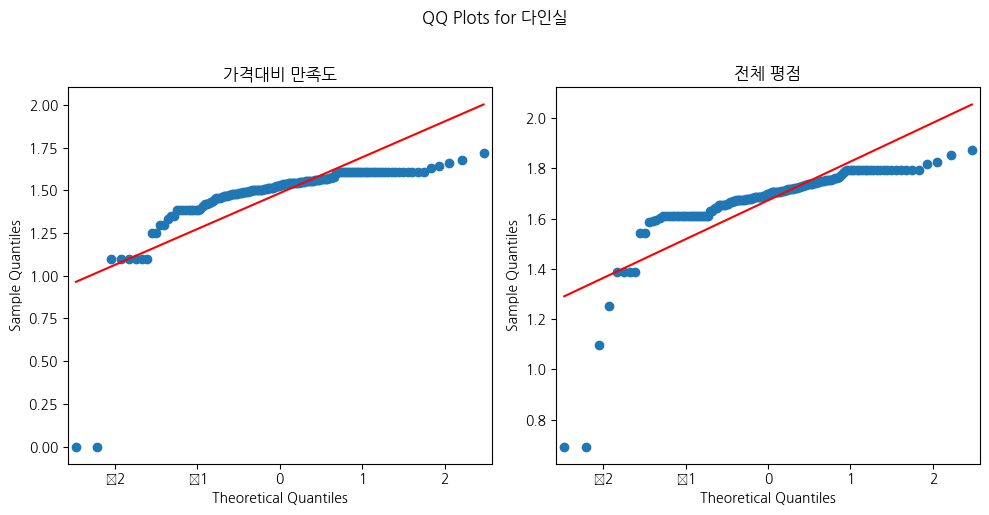

In [ ]:
# QQ Plot 그리기

import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.font_manager as fm




room_types = data['room_type'].unique()

for room in room_types:
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle(f'QQ Plots for {room}', y=1.02) # Add a main title for each room type

    # 1) review_scores_value
    sm.qqplot(
        data.loc[data['room_type'] == room, 'review_scores_value_log'],
        line='s',
        ax=axes[0]
    )
    axes[0].set_title('가격대비 만족도')

    # 2) review_scores_rating
    sm.qqplot(
        data.loc[data['room_type'] == room, 'review_scores_rating_log'],
        line='s',
        ax=axes[1]
    )
    axes[1].set_title('전체 평점')

    plt.tight_layout()
    plt.show()

In [ ]:
from scipy.stats import shapiro

# 로그 변환된 컬럼 이름 (여러분이 만든 컬럼명에 맞게 수정)
log_cols = ['review_scores_value_log', 'review_scores_rating_log']

print("=== 정규성 검정 (Shapiro-Wilk Test) ===")
print("H0: 데이터가 정규분포를 따른다")
print("p > 0.05이면 정규성 가정 충족\n")


for col in log_cols:
    print(f"[ 변수: {col} ]")
    for room in data['room_type'].unique():
        # room_type별, 해당 변수 데이터
        vals = data.loc[data['room_type'] == room, col].dropna()

        # Shapiro–Wilk 검정은 샘플 3개 이상 필요
        if len(vals) >= 3:
            stat, p = shapiro(vals)
            result = "정규성 충족" if p > 0.05 else "정규성 위반"
            print(f"  {room:20s}  n={len(vals):4d}  W={stat:.4f}  p={p:.4g}  → {result}")
        else:
            print(f"  {room:20s}  샘플 부족(n={len(vals)}) → 검정 불가")
    print()

=== 정규성 검정 (Shapiro-Wilk Test) ===
H0: 데이터가 정규분포를 따른다
p > 0.05이면 정규성 가정 충족

[ 변수: review_scores_value_log ]
  공간 전체                 n=8957  W=0.4815  p=1.294e-95  → 정규성 위반
  개인실                   n=2171  W=0.6014  p=3.006e-57  → 정규성 위반
  호텔 객실                 n= 170  W=0.4983  p=8.206e-22  → 정규성 위반
  다인실                   n= 148  W=0.5357  p=1.014e-19  → 정규성 위반

[ 변수: review_scores_rating_log ]
  공간 전체                 n=8957  W=0.5134  p=4.326e-94  → 정규성 위반
  개인실                   n=2171  W=0.6603  p=1.88e-54  → 정규성 위반
  호텔 객실                 n= 170  W=0.5521  p=9.595e-21  → 정규성 위반
  다인실                   n= 148  W=0.6206  p=5.922e-18  → 정규성 위반



/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8957.
  res = hypotest_fun_out(*samples, **kwds)




*   정규성을 만족하지 않아 **비모수 검정 (Kruskal-Wallis)** 으로 가야한다






---



####BOX-COX

/tmp/ipython-input-899551918.py:25: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


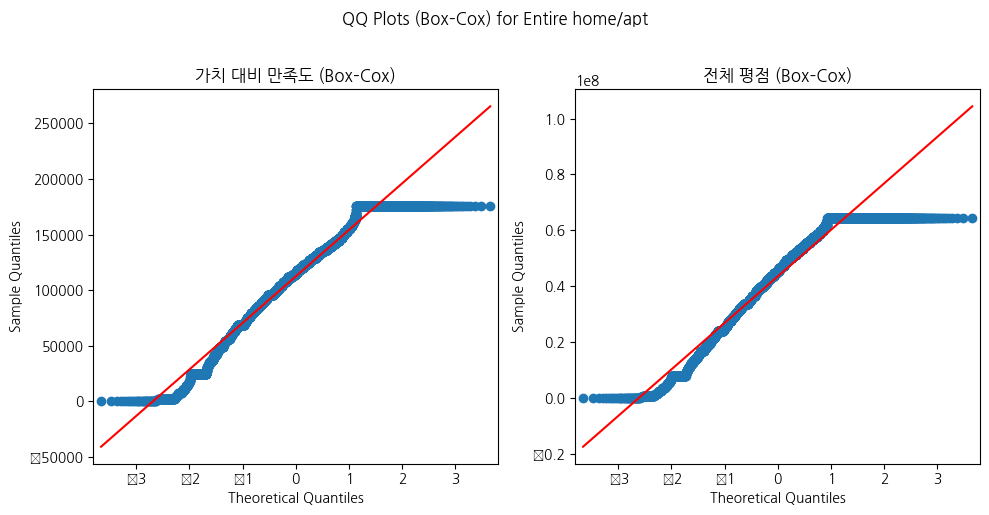

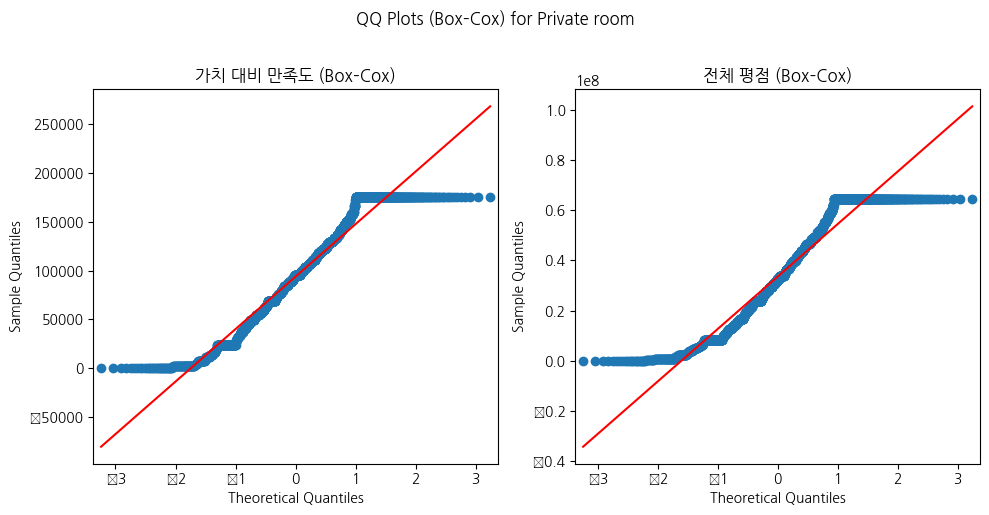

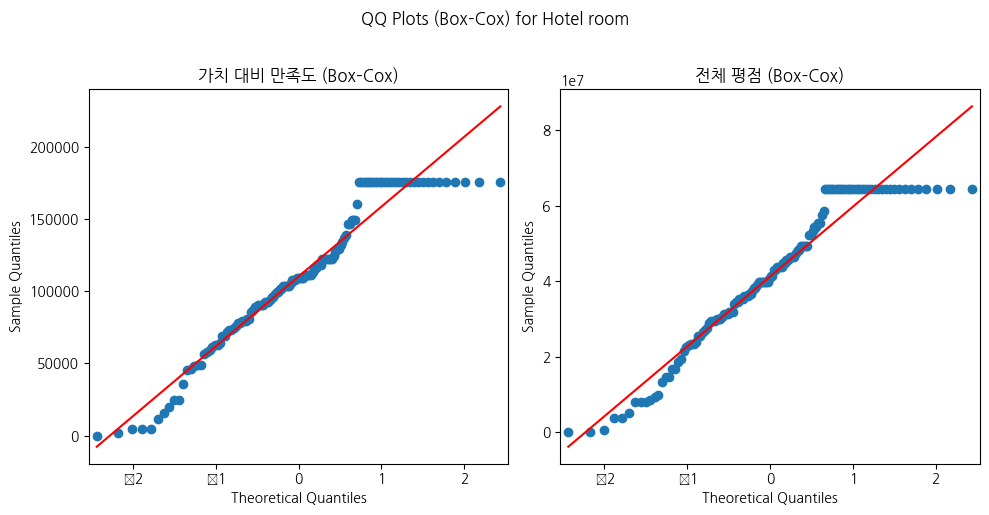

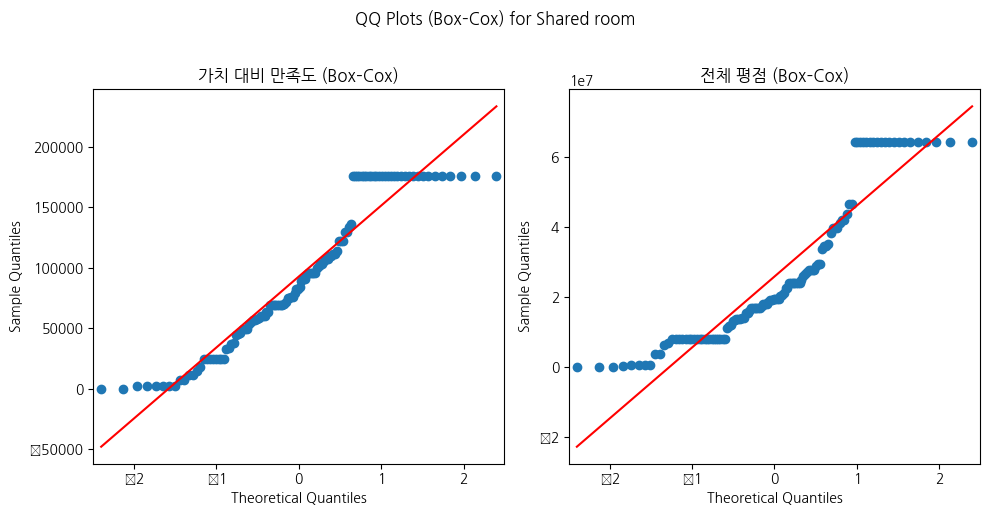

In [ ]:
#QQ-PlOT
import matplotlib.pyplot as plt
import statsmodels.api as sm

room_types = data['room_type'].unique()
cols = ['review_scores_value_boxcox', 'review_scores_rating_boxcox']

for room in room_types:
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle(f'QQ Plots (Box–Cox) for {room}', y=1.02)

    # 가치 대비 만족도
    sm.qqplot(
        data.loc[data['room_type'] == room, cols[0]].dropna(),
        line='s', ax=axes[0]
    )
    axes[0].set_title('가치 대비 만족도 (Box–Cox)')

    # 전체 평점
    sm.qqplot(
        data.loc[data['room_type'] == room, cols[1]].dropna(),
        line='s', ax=axes[1]
    )
    axes[1].set_title('전체 평점 (Box–Cox)')

    plt.tight_layout()
    plt.show()


In [ ]:
#Shapiro–Wilk Test
from scipy.stats import shapiro

log_cols = ['review_scores_value_boxcox', 'review_scores_rating_boxcox']

print("=== Shapiro–Wilk Test (Box–Cox 변환 데이터) ===")
print("H0: 데이터가 정규분포를 따른다 (p > 0.05이면 기각하지 않음)\n")

for col in log_cols:
    print(f"[변수: {col}]")
    for room in room_types:
        vals = data.loc[data['room_type'] == room, col].dropna()
        if len(vals) >= 3:   # 샘플 수가 3개 이상 필요
            stat, p = shapiro(vals)
            result = "정규성 만족" if p > 0.05 else "정규성 위반"
            print(f"{room:20s} n={len(vals):4d}  W={stat:.4f}  p={p:.4g}  → {result}")
        else:
            print(f"{room:20s} 샘플 부족(n={len(vals)}) → 검정 불가")
    print()


=== Shapiro–Wilk Test (Box–Cox 변환 데이터) ===
H0: 데이터가 정규분포를 따른다 (p > 0.05이면 기각하지 않음)

[변수: review_scores_value_boxcox]
Entire home/apt      n=8003  W=0.9662  p=1.184e-39  → 정규성 위반
Private room         n=1670  W=0.9475  p=6.053e-24  → 정규성 위반
Hotel room           n= 133  W=0.9347  p=7.211e-06  → 정규성 위반
Shared room          n= 120  W=0.9034  p=2.958e-07  → 정규성 위반

[변수: review_scores_rating_boxcox]
Entire home/apt      n=8025  W=0.9407  p=9.656e-49  → 정규성 위반
Private room         n=1672  W=0.9298  p=2.591e-27  → 정규성 위반
Hotel room           n= 134  W=0.9286  p=2.616e-06  → 정규성 위반
Shared room          n= 120  W=0.8542  p=1.641e-09  → 정규성 위반



/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8003.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8025.
  res = hypotest_fun_out(*samples, **kwds)


###Kruskal-Wallis




❓ **가설**

*   귀무가설(H₀) : 모든 룸타입의 모집단 분포(중앙값)가 같다.


*   대립가설(H₁) : 적어도 한 룸타입의 분포(중앙값)가 다르다.



In [ ]:
from scipy.stats import kruskal

# 분석할 y 컬럼 리스트 (로그 변환된 컬럼명에 맞게 수정)
targets = ['review_scores_value_log', 'review_scores_rating_log']

print("=== Kruskal–Wallis H-test by room_type ===")
print("귀무가설(H0): room_type별 모집단 분포(중앙값)가 모두 같다.\n")

for col in targets:
    # room_type별 값 묶기
    groups = [
        data.loc[data['room_type'] == room, col].dropna()
        for room in data['room_type'].unique()
    ]

    # 검정 실행
    stat, p = kruskal(*groups)

    print(f"[변수: {col}]")
    print(f"  H 통계량 : {stat:.4f}")
    print(f"  p-value  : {p:.4e}")
    if p < 0.05:
        print("  → 귀무가설 기각: room_type 간 중앙값(분포)에 유의한 차이가 있음\n")
    else:
        print("  → 귀무가설 채택: room_type 간 유의한 차이가 없음\n")


=== Kruskal–Wallis H-test by room_type ===
귀무가설(H0): room_type별 모집단 분포(중앙값)가 모두 같다.

[변수: review_scores_value_log]
  H 통계량 : 179.6669
  p-value  : 1.0409e-38
  → 귀무가설 기각: room_type 간 중앙값(분포)에 유의한 차이가 있음

[변수: review_scores_rating_log]
  H 통계량 : 348.0665
  p-value  : 3.9115e-75
  → 귀무가설 기각: room_type 간 중앙값(분포)에 유의한 차이가 있음





---



###사후 검정 (Dunn Test)

In [ ]:
pip install scikit-posthocs

In [ ]:
import scikit_posthocs as sp

targets = ['review_scores_value_log', 'review_scores_rating_log']

for col in targets:
    print(f"\n=== Dunn post-hoc test: {col} ===")

    # p_adjust='bonferroni' : 보정 방법 (Holm, fdr_bh 등 다른 방법도 가능)
    dunn_result = sp.posthoc_dunn(
        data,
        val_col   = col,
        group_col = 'room_type',
        p_adjust  = 'bonferroni'
    )

    print(dunn_result)



=== Dunn post-hoc test: review_scores_value_log ===
                개인실         공간 전체       다인실     호텔 객실
개인실    1.000000e+00  5.573032e-37  1.000000  0.145075
공간 전체  5.573032e-37  1.000000e+00  0.000049  0.594063
다인실    1.000000e+00  4.886748e-05  1.000000  0.188036
호텔 객실  1.450747e-01  5.940634e-01  0.188036  1.000000

=== Dunn post-hoc test: review_scores_rating_log ===
                개인실         공간 전체           다인실         호텔 객실
개인실    1.000000e+00  2.869855e-63  7.157487e-04  5.255997e-03
공간 전체  2.869855e-63  1.000000e+00  6.792462e-18  4.333831e-01
다인실    7.157487e-04  6.792462e-18  1.000000e+00  8.419985e-07
호텔 객실  5.255997e-03  4.333831e-01  8.419985e-07  1.000000e+00


#### 결과 해석

가치 대비 만족도의 경우

| 비교쌍                                | p-value      | 해석       |
| ---------------------------------- | ------------ | -------- |
| **Entire home/apt ↔ Private room** | **5.57e-37** | ✅ 유의한 차이 |
| **Entire home/apt ↔ Shared room**  | **4.89e-05** | ✅ 유의한 차이 |
| Hotel room ↔ Private room          | 0.145        | ✖ 유의 X   |
| Hotel room ↔ Shared room           | 0.188        | ✖ 유의 X   |
| Private room ↔ Shared room         | 1.000        | ✖ 유의 X   |
| Entire home/apt ↔ Hotel room       | 0.594        | ✖ 유의 X   |


**해석**



*   Private room과 Entire home/apt 간 차이가 매우 큼.
*   Shared room도 Entire home/apt와 차이가 있음.

*   나머지 쌍(Hotel vs. others 등)은 통계적으로 유의한 차이 없음.










---



전체 평점의 경우

| 비교쌍                                | p-value      | 해석     |
| ---------------------------------- | ------------ | ------ |
| **Entire home/apt ↔ Private room** | **2.87e-63** | ✅ 유의   |
| **Entire home/apt ↔ Shared room**  | **6.79e-18** | ✅ 유의   |
| **Hotel room ↔ Private room**      | **5.26e-07** | ✅ 유의   |
| **Hotel room ↔ Shared room**       | **8.42e-07** | ✅ 유의   |
| **Private room ↔ Shared room**     | **7.16e-04** | ✅ 유의   |
| Entire home/apt ↔ Hotel room       | 0.433        | ✖ 유의 X |


**해석**



*   Private room과 대부분의 다른 타입(Entire, Hotel, Shared) 모두 차이 큼.
*   Shared room도 여러 타입과 차이가 큼.

*   Entire home/apt ↔ Hotel room 만 유의하지 않음 → 이 둘의 평점은 비슷.








##EDA

In [ ]:
#한글 글씨 폰트 설치
%%capture
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
plt.rcParams['font.family'] = 'NanumGothic'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# 1) 집계: room_type별 평균
mean_df = (
    data.groupby('room_type')[['review_scores_value', 'review_scores_rating']]
        .mean()
        .reset_index()
)


In [ ]:
# 바꾸고 싶은 매핑 정의
name_map = {
    'Entire home/apt': '공간 전체',
    'Hotel room':      '호텔 객실',
    'Private room':    '개인실',
    'Shared room':     '다인실'
}

# 값 치환
data['room_type'] = data['room_type'].replace(name_map)


In [ ]:
order_val = mean_df.sort_values('review_scores_value', ascending=False)['room_type']
order_rat = mean_df.sort_values('review_scores_rating', ascending=False)['room_type']

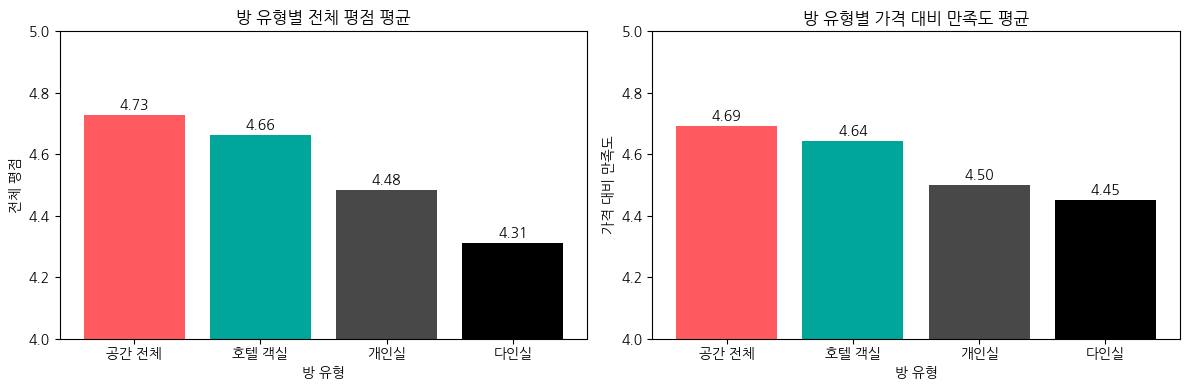

In [ ]:
# 그래프 그리기
plt.figure(figsize=(12, 4))
colors = ['#ff5a5f', '#00a699', '#484848','#000000']
# Subplot 1: 가치 대비 만족도
plt.subplot(1, 2, 2)
# Order the room types based on review_scores_value
mean_df_value_ordered = mean_df.sort_values('review_scores_value', ascending=False)
bars2 = plt.bar(mean_df_value_ordered['room_type'], mean_df_value_ordered['review_scores_value'],color = colors)
plt.title("방 유형별 가격 대비 만족도 평균")
plt.ylabel('가격 대비 만족도')
plt.xlabel('방 유형')
plt.ylim(4,5)

# Add text labels for Subplot 1
for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

# Subplot 2: 전체 평점
plt.subplot(1, 2, 1)
# Order the room types based on review_scores_rating
mean_df_rating_ordered = mean_df.sort_values('review_scores_rating', ascending=False)
bars1 = plt.bar(mean_df_rating_ordered['room_type'], mean_df_rating_ordered['review_scores_rating'],color=colors)
plt.title("방 유형별 전체 평점 평균")
plt.ylabel('전체 평점')
plt.xlabel('방 유형')
plt.ylim(4,5)

# Add text labels for Subplot 2
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

###숙소 개수

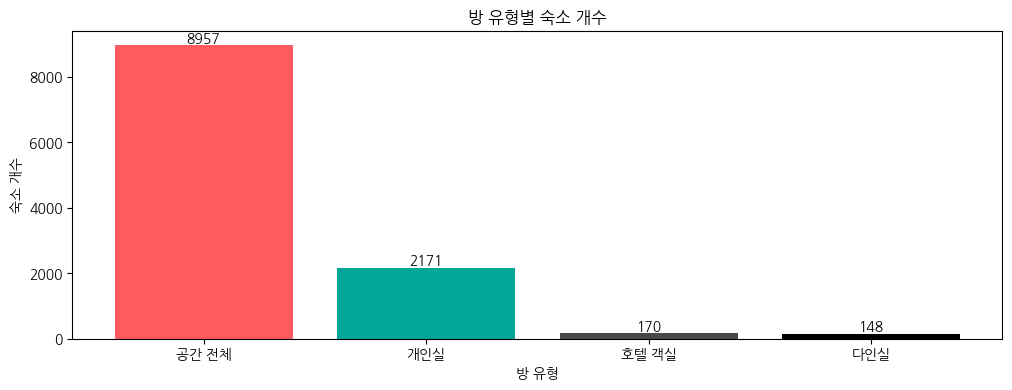

In [ ]:
# 그래프 그리기
plt.figure(figsize=(12, 4))
colors = ['#ff5a5f', '#00a699', '#484848','#000000']

room_type_counts = data['room_type'].value_counts()

bars = plt.bar(room_type_counts.index, room_type_counts.values, color = colors)
plt.title("방 유형별 숙소 개수")
plt.ylabel('숙소 개수')
plt.xlabel('방 유형')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.0f}', ha='center', va='bottom') # Changed to .0f for counts
plt.show()

#이도권: 머신러닝

**머신러닝 모델의 훈련단계**

1. 라이브러리 import
2. 데이터불러오기
3. 전처리(데이터 클랜징, 정규화, 범주화데이터 처리)
4. 데이터 분리(train, test)
5. 모델정의(내가 어떤 모델을 사용할지, 하이퍼파라미터 설정)
6. 모델훈련(.fit() -  파라미터 훈련해서 함수통을 만든다)
7. 훈련결과확인 (정확도, 시각적방법)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/combined_dataset.csv')

In [ ]:
data

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,IS_SUCCESS
0,23163,https://www.airbnb.com/rooms/23163,20240325142220,2024-03-25,city scrape,Residence Karolina - KAROL12,"Unique and elegant apartment rental in Prague,...",NaN,https://a0.muscache.com/pictures/01bbe32c-3f13...,5282,...,4.93,4.86,NaN,t,70,69,0,0,0.18,0
1,23169,https://www.airbnb.com/rooms/23169,20240325142220,2024-03-25,city scrape,Residence Masna - Masna302,Masna studio offers a lot of space and privacy...,NaN,https://a0.muscache.com/pictures/b450cf2a-8561...,5282,...,4.97,4.69,NaN,t,70,69,0,0,0.69,0
2,26755,https://www.airbnb.com/rooms/26755,20240325142220,2024-03-25,city scrape,Central Prague Old Town Top Floor,Big and beautiful new attic apartment in the v...,This apartment offers a fantastic location. Yo...,https://a0.muscache.com/pictures/miso/Hosting-...,113902,...,4.93,4.89,NaN,f,3,3,0,0,3.32,1
3,30762,https://www.airbnb.com/rooms/30762,20240325142220,2024-03-25,city scrape,Residence Rybna - Rybna23,"We offer a modern, comfortable, serviced apart...",NaN,https://a0.muscache.com/pictures/dfbb2fc2-91a0...,5282,...,4.94,4.50,NaN,t,70,69,0,0,0.10,0
4,42514,https://www.airbnb.com/rooms/42514,20240325142220,2024-03-25,city scrape,"""NEWLY FURNISHED"" 1BR near Pachtuv Palace,Old ...",*NEWLY* Furnished 1-bedroom apartment on the f...,NaN,https://a0.muscache.com/pictures/7f66bc43-25c7...,185641,...,4.90,4.79,NaN,f,1,1,0,0,2.01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11441,981052671610489770,https://www.airbnb.com/rooms/981052671610489770,20230917033704,2023-09-17,city scrape,Bed and breakfast in Praha 7 · ★New · 1 bedroo...,Capsule hostel is the future of travelers. It ...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,499362507,...,NaN,NaN,NaN,t,1,0,1,0,NaN,0
11442,981147682732529851,https://www.airbnb.com/rooms/981147682732529851,20230917033704,2023-09-17,city scrape,Rental unit in Praha 5 · ★New · 1 bedroom · 2 ...,Enjoy your Prague holiday in my modern and cos...,"Velmi klidné sousedství, 5 min od velkého náku...",https://a0.muscache.com/pictures/miso/Hosting-...,54027671,...,NaN,NaN,NaN,f,1,1,0,0,NaN,0
11443,981149791292539293,https://www.airbnb.com/rooms/981149791292539293,20230917033704,2023-09-17,city scrape,Rental unit in Praha 1 · ★New · 1 bedroom · 3 ...,"Welcome to our spacious, quiet apartment, perf...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,468925367,...,NaN,NaN,NaN,t,2,2,0,0,NaN,0
11444,981241350406265221,https://www.airbnb.com/rooms/981241350406265221,20230917033704,2023-09-17,city scrape,Rental unit in Praha 1 · ★New · 1 bedroom · 1 ...,Спокойно планируйте маршруты: жилье расположен...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,507431786,...,NaN,NaN,NaN,t,5,0,5,0,NaN,0



> 2. 성공의 기준 만들기
    1. 1년 내에 5개 이상
    2. 평점 4.9 이상




In [ ]:
data['IS_SUCCESS'] = (data['number_of_reviews_ltm'] >= 5) & (data['review_scores_rating'] >= 4.9)

In [ ]:
X = data[['property_type','room_type','neighbourhood_cleansed','host_is_superhost','host_identity_verified','host_listings_count','accommodates','bedrooms','beds']]
y = data['IS_SUCCESS'].astype(int)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

num_cols = X_train.select_dtypes(include=['number','float64','int64']).columns
cat_cols = X_train.select_dtypes(include=['object','category']).columns

### XGBoost




In [ ]:
# XGBoost 파라미터 설정
params = {
    'objective': 'binary:logistic',
    'max_depth': 6,
    'learning_rate': 0.1,
    'n_estimators': 300,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'gamma': 0,
    'reg_alpha': 0,
    'reg_lambda': 1,
    'random_state': 42,
    #'use_label_encoder': False,
    'eval_metric': 'logloss',
    'tree_method' : 'hist', #GPU적용
    'device' : 'cuda'
}

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

import xgboost as xgb
from xgboost.callback import EarlyStopping



# 2) preprocessing (트리는 스케일링 불필요)
num_cols = X_train.select_dtypes(include=['number','float64','int64']).columns
cat_cols = X_train.select_dtypes(include=['object','category']).columns

pre = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), num_cols),
        ('cat', Pipeline([
            ('imp', SimpleImputer(strategy='most_frequent')),
            ('oh', OneHotEncoder(handle_unknown='ignore'))
        ]), cat_cols),
    ],
    remainder='drop'
)

Xtr_enc = pre.fit_transform(X_train)   # sparse matrix OK
Xva_enc = pre.transform(X_val)

# 3) DMatrix로 변환
dtrain = xgb.DMatrix(Xtr_enc, label=y_train.values)
dvalid = xgb.DMatrix(Xva_enc, label=y_val.values)

# 4) params + 조기 종료 콜백
neg, pos = np.bincount(y_train)
scale_pos_weight = neg / max(pos, 1)

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'tree_method': 'hist',      # GPU면 'gpu_hist'
    'learning_rate': 0.05,
    'max_depth': 6,
    'min_child_weight': 3,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_lambda': 1.0,
    'scale_pos_weight': scale_pos_weight,
    'seed': 42,
}

early_stop = EarlyStopping(rounds=50, metric_name='auc', save_best=True)

# 5) 학습 (num_boost_round은 크게, 조기 종료가 멈춰줌)
evals = [(dtrain, 'train'), (dvalid, 'valid')]
bst = xgb.train(params, dtrain,
                num_boost_round=10000,
                evals=evals,
                callbacks=[early_stop],
                verbose_eval=False)

print("Best iteration:", bst.best_iteration + 1)

# 6) 예측/평가 (best iteration까지 사용)
proba = bst.predict(dvalid, iteration_range=(0, bst.best_iteration + 1))
print('AUC:', roc_auc_score(y_val, proba))

pred = (proba >= 0.5).astype(int)
print(classification_report(y_val, pred))
print('Confusion matrix:\n', confusion_matrix(y_val, pred))


Best iteration: 6
AUC: 0.8542649727767694
              precision    recall  f1-score   support

           0       0.96      0.72      0.82       285
           1       0.38      0.86      0.53        58

    accuracy                           0.74       343
   macro avg       0.67      0.79      0.68       343
weighted avg       0.86      0.74      0.77       343

Confusion matrix:
 [[204  81]
 [  8  50]]


###HistGradientBoosting

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_hist_gradient_boosting # for HistGradientBoostingClassifier in older versions
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.inspection import permutation_importance
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score


# Identify non-numeric columns
non_numeric_cols = X_train.select_dtypes(exclude=np.number).columns

# Drop non-numeric columns
X_train_numeric = X_train.drop(columns=non_numeric_cols)
X_val_numeric = X_val.drop(columns=non_numeric_cols)


# 6. 스케일링 (선택적)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_val_scaled = scaler.transform(X_val_numeric)

# 7. 모델 학습 (HistGradientBoosting → NaN 자동 처리 가능)
gb_model = HistGradientBoostingClassifier(
    max_iter=300,
    learning_rate=0.05,
    max_depth=6,
    random_state=42
)
gb_model.fit(X_train_scaled, y_train)

# 8. 예측 및 평가
y_pred = gb_model.predict(X_val_scaled)
y_prob = gb_model.predict_proba(X_val_scaled)[:, 1]

print("=== Classification Report ===")
print(classification_report(y_val, y_pred))
print("ROC-AUC:", roc_auc_score(y_val, y_prob))

# 9. 피처 중요도 (Permutation Importance 사용)
# Use the column names from the numeric dataframe for importance_series
importances = permutation_importance(gb_model, X_val_scaled, y_val, n_repeats=10, random_state=42)
importance_series = pd.Series(importances.importances_mean, index=X_val_numeric.columns)

print("\n=== Feature Importances (Permutation) ===")
print(importance_series.sort_values(ascending=False).head(15))

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       285
           1       0.36      0.09      0.14        58

    accuracy                           0.82       343
   macro avg       0.60      0.53      0.52       343
weighted avg       0.76      0.82      0.77       343

ROC-AUC: 0.6820931639443436

=== Feature Importances (Permutation) ===
host_listings_count    0.017493
bedrooms               0.000292
beds                  -0.002624
accommodates          -0.004956
dtype: float64
